# Visualize 3D Points (Parabolic data)
This notebook uses 3D plots to visualize 3D points. Reads measurement data from a csv file.

In [1]:
%matplotlib notebook
##%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from filter.kalman import Kalman3D

fmt = lambda x: "%9.3f" % x
np.set_printoptions(formatter={'float_kind':fmt})

## Read from csv file
import pandas as pd


## Read and Prepare Data
Read ball tracking position data from saved CSV file and prepare mx,my,mz. The file should have dT values along with X,Y,Z values.

We use these as measurements and use Kalman3D tracker to track the ball. Once we exhaust all measurements, we use Kalman3D to predict rest of the trajectory.
*Note*: The position data that we are using is in millimeters and milliseconds. However, the Kalman3D tracker uses all values in meters and seconds. We have do to this conversion here.

In [2]:
# File containing 3D points predicted and measured. Last column with time passage will be ignored
SYNTH = False

if SYNTH:
    data_ = pd.read_csv('data/datafile_parabolic.csv')  ## Synthetic data
else:
    data_ = pd.read_csv('data/input_positions_2.csv')  ## Real data
print(data_.keys())
data = data_/1000.
_mx = np.float32(data['mx'])
_my = np.float32(data['my'])
_mz = np.float32(data['mz'])
if SYNTH:
    ## Drop useless data
    mx = _mx[0:19]
    my = _my[0:19]
    mz = _mz[0:19]
else:
    mx = _mx
    my = _my
    mz = _mz
print("mx: {} {}".format(mx.shape, mx))
print("my: {} {}".format(my.shape, my))
print("mz: {} {}".format(mz.shape, mz))

def getpos(i, x,y,z):
    return(np.float32([x[i],y[i],z[i]]))

Index(['mx', 'my', 'mz'], dtype='object')
mx: (13,) [    1.317     1.311     1.294     1.288     1.280     1.273     1.267
     1.255     1.247     1.242     1.232     1.227     1.211]
my: (13,) [    0.844     0.860     0.892     0.902     0.914     0.923     0.928
     0.935     0.934     0.942     0.934     0.927     0.913]
mz: (13,) [    5.903     6.030     6.268     6.388     6.500     6.627     6.736
     6.859     6.998     7.094     7.228     7.368     7.718]


## Track and Predict
Now we use our Kalman3D tracker to  track the position of the ball based on measured data and then predict the trajectory when all measurement data is exhausted.

In [3]:
fps = 100.
dT  = (1 / fps)
print("dT: {:f}".format(dT))
KF = Kalman3D(drg=1.0, dbg=0)
pred = KF.init(getpos(0,mx,my,mz))
print("pred: {}".format(pred))
##-#######################################################################################
## Tracking
## Since we are doing all operations in zero time, specify dT manually (e.g., 0.033 sec)
px = np.float32([pred[0]])
py = np.float32([pred[1]])
pz = np.float32([pred[2]])
for i in range(len(mx)-1):
    pred = KF.track(getpos([i+1], mx, my, mz), dT)
    px = np.append(px, pred[0])
    py = np.append(py, pred[1])
    pz = np.append(pz, pred[2])
    print("  tracked position : {}".format(pred*1000))

##-#######################################################################################
## Trajectory prediction
## Since we are doing all operations in zero time, specify dT manually (e.g., 0.033 sec)
for ii in range(15):
    pred = KF.predict(dT)   # Use last value of dT for all predictions
    px = np.append(px, pred[0])
    py = np.append(py, pred[1])
    pz = np.append(pz, pred[2])
    print("predicted position : {}".format(pred*1000))

dT: 0.010000
pred: [    1.317     0.844     5.903]
  tracked position : [ 1316.000   849.286  5940.000]
  tracked position : [ 1307.618   866.721  6074.385]
  tracked position : [ 1299.317   882.112  6216.394]
  tracked position : [ 1290.799   896.028  6349.856]
  tracked position : [ 1282.780   907.470  6483.292]
  tracked position : [ 1275.536   915.626  6607.822]
  tracked position : [ 1265.834   922.974  6734.271]
  tracked position : [ 1256.705   926.059  6869.658]
  tracked position : [ 1249.336   931.232  6989.152]
  tracked position : [ 1240.480   929.759  7118.613]
  tracked position : [ 1233.271   925.196  7256.451]
  tracked position : [ 1221.530   915.536  7502.426]
predicted position : [ 1219.455   907.223  7550.516]
predicted position : [ 1217.380   897.930  7598.606]
predicted position : [ 1215.305   887.656  7646.696]
predicted position : [ 1213.230   876.403  7694.786]
predicted position : [ 1211.156   864.170  7742.876]
predicted position : [ 1209.081   850.956  7790.

px size (28,)
tm size (28,)
PX, MX


<IPython.core.display.Javascript object>


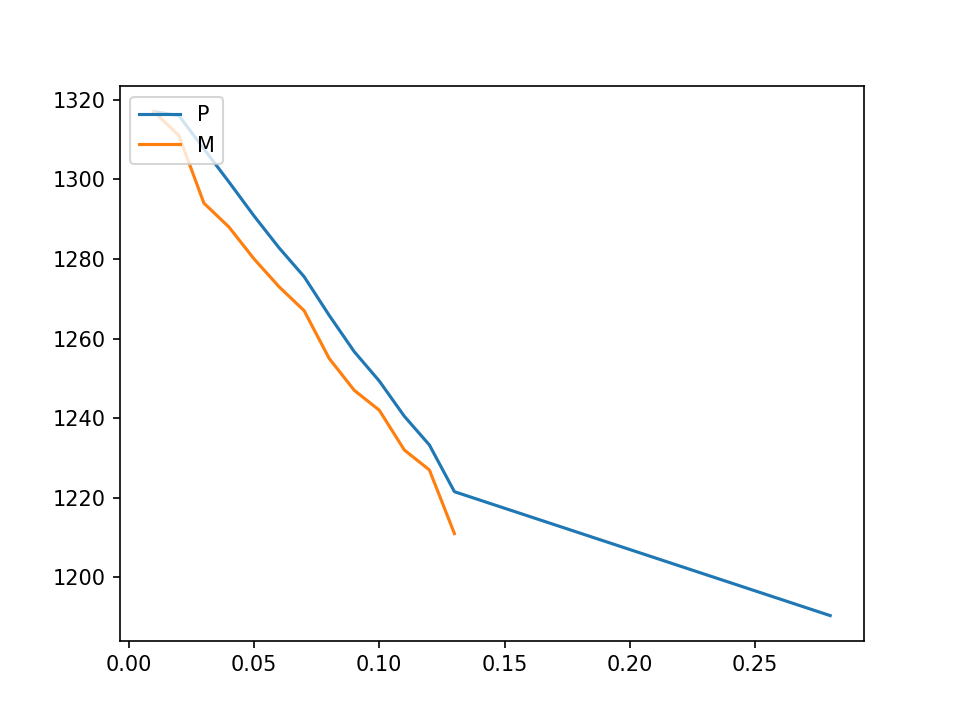

PY, MY


<IPython.core.display.Javascript object>


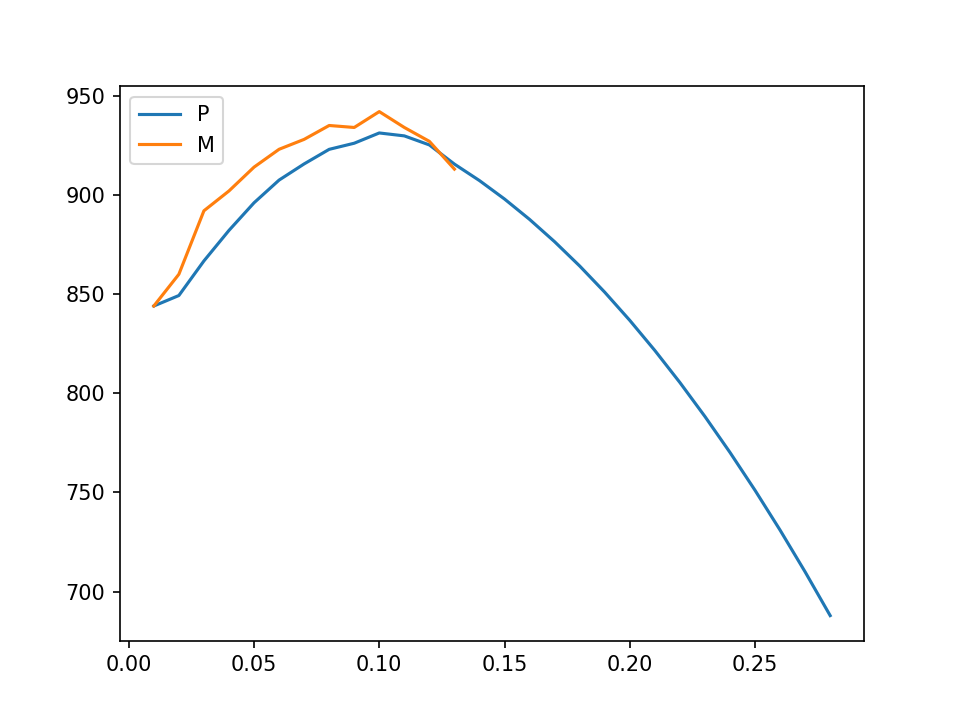

PZ, MZ


<IPython.core.display.Javascript object>


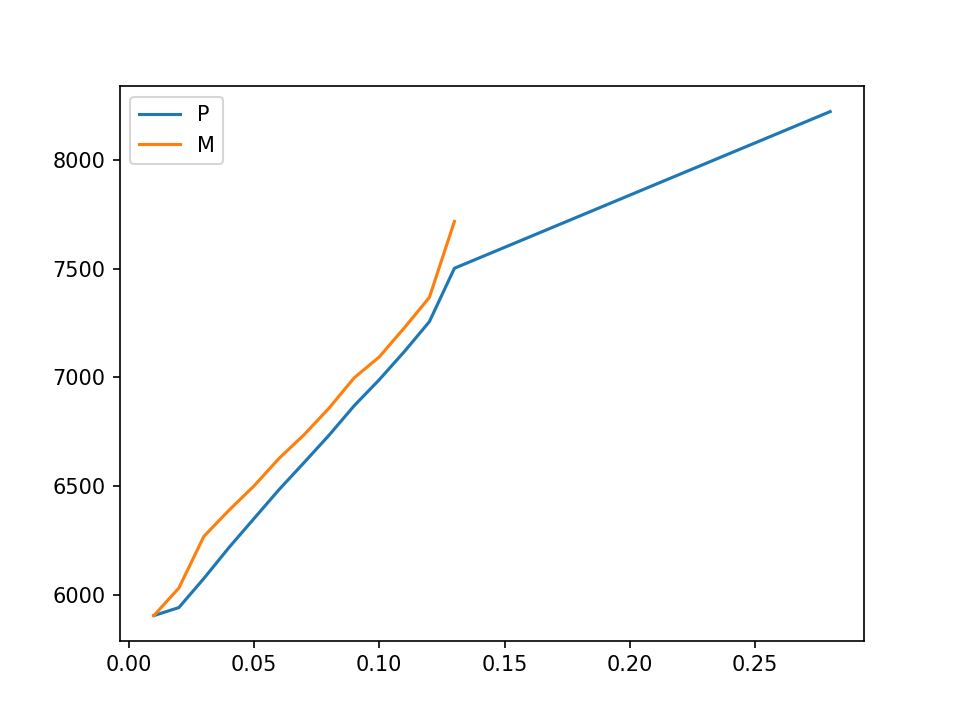

In [4]:
sum = 0
tm  = np.zeros(len(px))
for i in range(len(tm)):
    sum += dT
    tm[i] = sum

## Convert mx also back to millimeters.
px = px * 1000.
py = py * 1000.
pz = pz * 1000.
nmx = mx * 1000.
nmy = my * 1000.
nmz = mz * 1000.
ntm = tm * 1000.
##-#######################################################################################
## Everything is in millimeters and milliseconds now
##-#######################################################################################
print("px size", px.shape)
print("tm size", tm.shape)

## Visualize X, Y, and Z individually
## In the plot below, we visualize the pairs of px, mx; py, my and pz, mz to see how they relate to each other
print("PX, MX")
fig1a = plt.figure()
plt.plot(tm, px)
plt.plot(tm[0:len(nmx)], nmx)
plt.legend('PM', ncol=1, loc='upper left')

print("PY, MY")
fig1b = plt.figure()
plt.plot(tm, py)
plt.plot(tm[0:len(nmy)], nmy)
plt.legend('PM', ncol=1, loc='upper left')

print("PZ, MZ")
fig1c = plt.figure()
plt.plot(tm, pz)
plt.plot(tm[0:len(nmz)], nmz)
plt.legend('PM', ncol=1, loc='upper left')

## Visualize (X,Y,Z) of Predicted and Measured in Points in 3D
In the plot below, we visualize all the predicted and measured points in 3D. This gives a more realistic view of how the predicted points are related to the measured points.

<IPython.core.display.Javascript object>


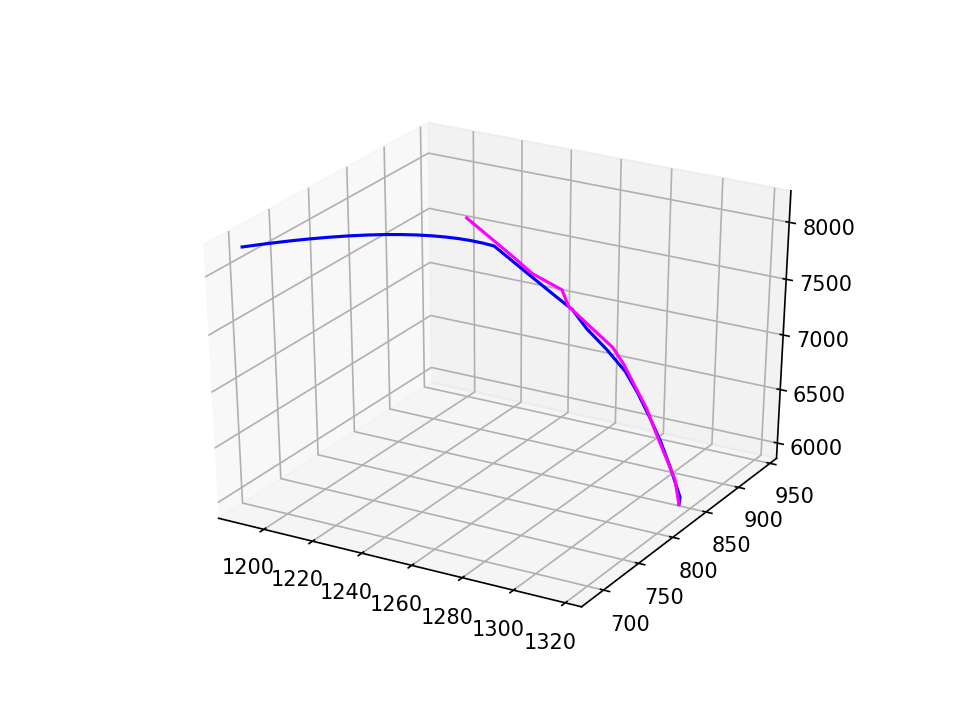

In [5]:
fig2 = plt.figure()
ax = plt.axes(projection='3d')
#ax.set_xlim3d(-2000,2000)
#ax.set_ylim3d(-2000,2000)
#ax.set_zlim3d(-2000,2000)

if 0: ## Plot axis or not
    st = [0,0,0]
    xx = [200,   0,   0]
    yy = [  0, 200,   0]
    zz  =[  0,   0, 200]
    for i in range(len(st)):
        ax.plot([st[i], xx[i]], [st[i],yy[i]],zs=[st[i],zz[i]])

ax.plot3D(px, py, pz, 'blue')
ax.plot3D(nmx, nmy, nmz, 'magenta')
